In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [11]:
# Data Overview
def dataset_overview():
    print("--- Customers Dataset ---")
    print(customers.info())
    print(customers.describe(include='all'))

    print("\n--- Products Dataset ---")
    print(products.info())
    print(products.describe(include='all'))

    print("\n--- Transactions Dataset ---")
    print(transactions.info())
    print(transactions.describe(include='all'))

In [12]:
# Missing values and duplicates check
def check_missing_duplicates():
    print("Missing Values in Customers:\n", customers.isnull().sum())
    print("Missing Values in Products:\n", products.isnull().sum())
    print("Missing Values in Transactions:\n", transactions.isnull().sum())

    print("\nDuplicate Rows in Customers:", customers.duplicated().sum())
    print("Duplicate Rows in Products:", products.duplicated().sum())
    print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

In [13]:
# Exploratory Visualizations
def visualizations():
    # Customer distribution by region
    plt.figure(figsize=(8, 5))
    customers['Region'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.show()

    # Product categories
    plt.figure(figsize=(8, 5))
    products['Category'].value_counts().plot(kind='bar', color='lightgreen')
    plt.title('Product Categories Distribution')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.show()

    # Transaction trends over time
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
    transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(figsize=(10, 6))
    plt.title('Monthly Transaction Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Transaction Value')
    plt.show()

    # Top customers by transaction value
    top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
    top_customers.plot(kind='bar', color='orange', figsize=(8, 5))
    plt.title('Top 10 Customers by Total Transaction Value')
    plt.xlabel('CustomerID')
    plt.ylabel('Total Transaction Value')
    plt.show()

    # Top products by quantity sold
    top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
    top_products.plot(kind='bar', color='purple', figsize=(8, 5))
    plt.title('Top 10 Products by Quantity Sold')
    plt.xlabel('ProductID')
    plt.ylabel('Total Quantity Sold')
    plt.show()

--- Customers Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

--- Products Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1 

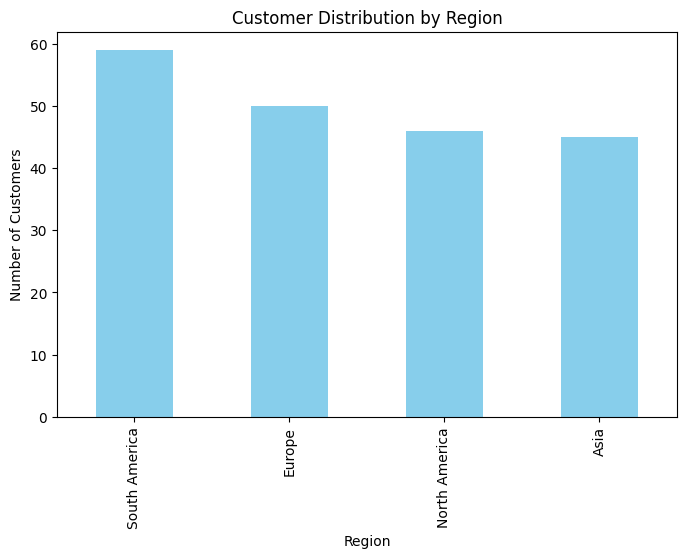

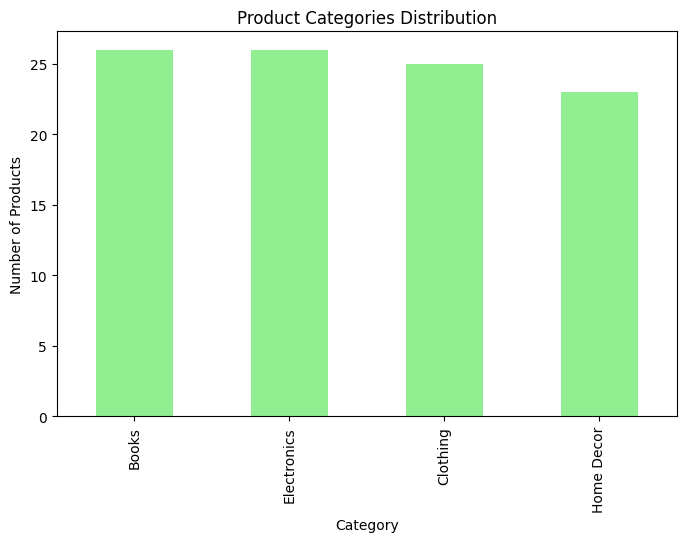

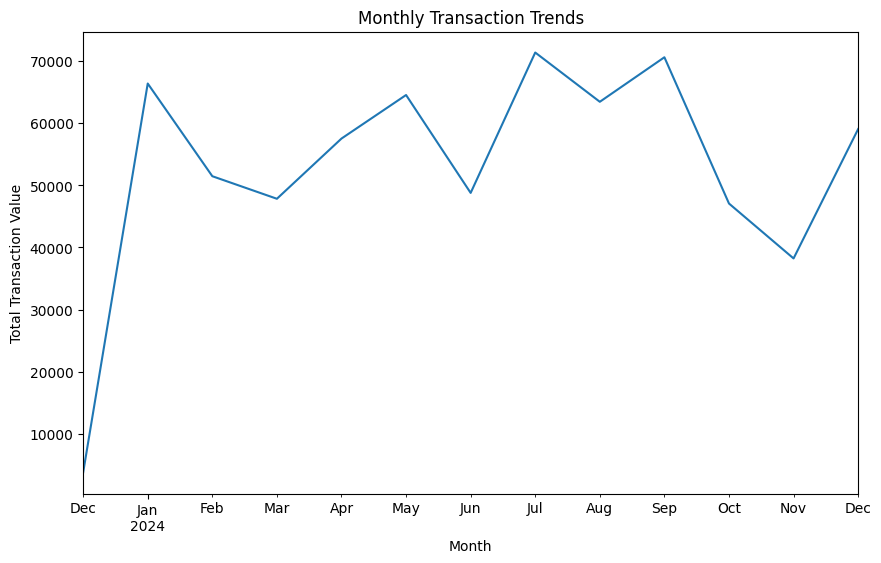

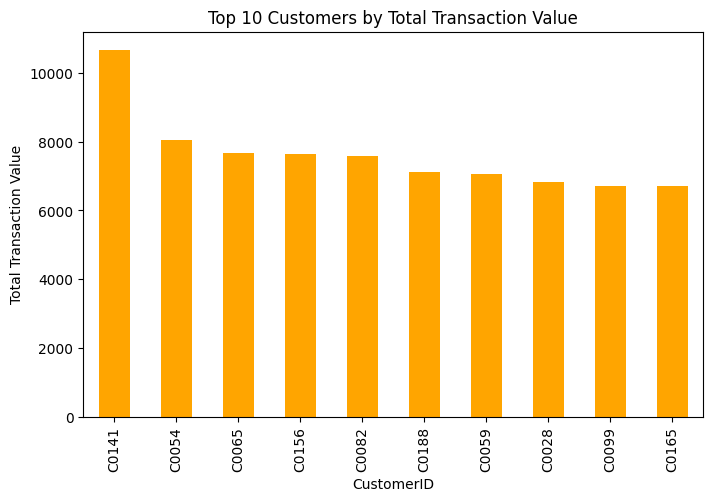

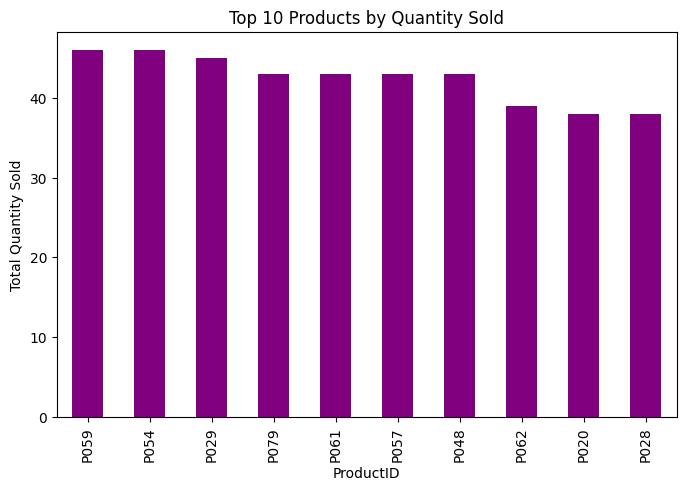

In [14]:
# Call functions
dataset_overview()
check_missing_duplicates()
visualizations()